In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from bhmie import bhmie
import miepython

### Check the Intensity of scattering from 0-360

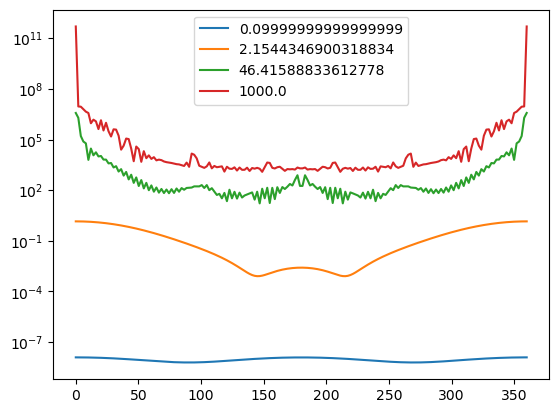

In [5]:
#miepython
fig,ax = plt.subplots()

m = 1.12-0.0006j

angle = np.linspace(0.,360.,180)
mu = np.array([np.cos(np.radians(theta)) for theta in angle])
for x in np.logspace(-1,3,4):
    #mu = 0.001
    S1,S2 = miepython.mie_S1_S2(m,x,mu,norm="wiscombe")
    i1 = np.abs(S1) ** 2
    i2 = np.abs(S2) ** 2
    I  = i1+i2
    ax.plot(angle,I,label=x)
ax.legend()
ax.set_yscale("log")
plt.show()

### plot Qbb(x) :x=1e-1:1e4

In [6]:
### derive Qbb at each m and x
def qbb(m,x):
    def scattering_for_eachAngle(theta):
        cos = np.cos(np.radians(theta))
        sin = np.sin(np.radians(theta))
        S1,S2 = miepython.mie_S1_S2(m,x,cos,norm="wiscombe")
        i1 = abs(S1) ** 2
        i2 = abs(S2) ** 2
        I  = i1+i2
        return I*sin
    integrated,err = integrate.quad(scattering_for_eachAngle,90,180)

    return integrated/(x**2)

In [ ]:
#qbb(1.12-0.0006j,3)
m = 1.12-0.0006j
x=np.logspace(-1,4,10000)
qbb_cal = [qbb(m,x) for x in x]
fig,ax = plt.subplots()
ax.plot(x,qbb_cal)
ax.set_ylabel("Qbb(Backscattering Efficiency Factor)")
ax.set_xlabel("Size Parameter(x)")
ax.set_title("Backscattering Efficiency m=1.12-0.0006j")
ax.set_xscale("log")
plt.show()

### approximate Qbb(x) by polynomial approximation

#### use np.polyfit

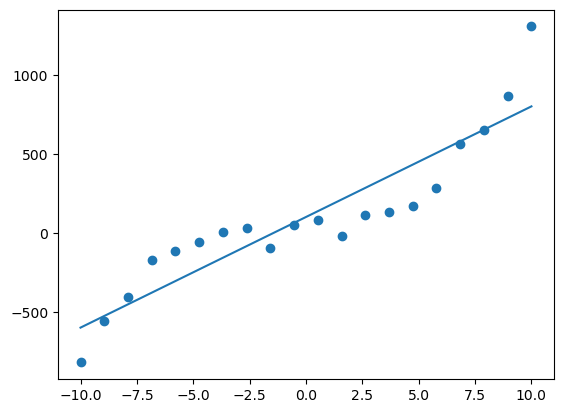

In [4]:
#### example of np.polyfit
x= np.linspace(-10,10,20)
y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50
#近似式の係数
res1=np.polyfit(x, y, 1) #1:order
#近似式の計算
y1 = np.poly1d(res1)(x) #1次
#グラフ表示
plt.scatter(x, y)
plt.plot(x, y1)
plt.show()

In [16]:
x=np.logspace(-2,4,1000)
qbb_cal = np.array([qbb(m,x) for x in x])


/tmp/ipykernel_2993841/3448011202.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated,err = integrate.quad(scattering_for_eachAngle,90,180)
/tmp/ipykernel_2993841/3448011202.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated,err = integrate.quad(scattering_for_eachAngle,90,180)


/tmp/ipykernel_2993841/2796271302.py:4: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(logx,qbb_cal,order)


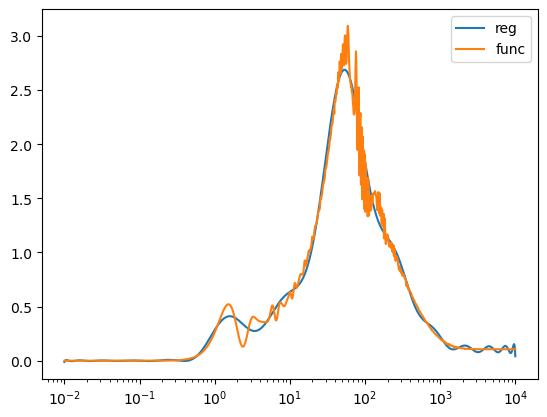

In [47]:
order =40
x=np.logspace(-2,4,1000)
logx = np.log10(x)
reg = np.polyfit(logx,qbb_cal,order)
fx = np.polyval(reg,logx)

#plot
fig,ax = plt.subplots()
ax.plot(10**logx,fx,label="reg")
ax.plot(x,qbb_cal,label="func")
ax.legend()
ax.set_xscale("log")
plt.show()


### make function

In [48]:
def approximate_qbb_polynomial(m,order=40):
    def qbb(m,x):
        def scattering_for_eachAngle(theta):
            cos = np.cos(np.radians(theta))
            sin = np.sin(np.radians(theta))
            S1,S2 = miepython.mie_S1_S2(m,x,cos,norm="wiscombe")
            i1 = abs(S1) ** 2
            i2 = abs(S2) ** 2
            I  = i1+i2
            return I*sin
        integrated,err = integrate.quad(scattering_for_eachAngle,90,180)

        return integrated/(x**2)
    
    x=np.logspace(-2,4,1000)
    qbb_cal = np.array([qbb(m,x) for x in x])

    logx = np.log10(x)
    reg = np.polyfit(logx,qbb_cal,order)

    return reg